## Określenie liczby klastrów i budowa modelu

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn_extra.cluster import KMedoids
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import distance
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import calinski_harabasz_score
import re
import webcolors
from tqdm import tqdm
import ast
import math

## Wczytanie danych

In [122]:
titles = pd.read_csv('titles_final.csv')

In [123]:
titles.drop(columns=titles.columns[0], axis=1, inplace=True)

In [124]:
lex_similarity = pd.read_csv('lex_similarity_final.csv', index_col=None)

In [125]:
jacc_similarity = pd.read_csv('jacc_similarity_final.csv', index_col=None)

In [126]:
jacc_similarity.drop(columns=jacc_similarity.columns[0], axis=1, inplace=True)
lex_similarity.drop(columns=lex_similarity.columns[0], axis=1, inplace=True)

In [128]:
titles

,0
0,"['intel', 'core', 'i', '6100', 'skylake', '70g..."
1,"['intel', 'xeon', 'e', '2608lv', 'ghz', 'core'..."
2,"['intel', 'core', 'i', 'i', '8500t', 'hexa', '..."
3,"['hp', 'intel', 'xeon', 'x5450', 'ghz', '12mb'..."
4,"['hewlett', 'packard', 'enterprise', '495906',..."
...,...
7771,"['hotpoint', 'aquarius', 'free', 'standing', '..."
7772,"['hotpoint', 'extra', 'kg', '1400', 'spin', 'w..."
7773,"['hotpoint', 'wmaqb741guk', '1400', 'spin', 'k..."
7774,"['indesit', 'bwa81483xsuk', 'bwa81483xsuk']"


In [129]:
#Analogicznie dla danych testowych

titles_test = pd.read_csv('titles_final_test.csv')
lex_similarity_test = pd.read_csv('lex_similarity_final_test.csv', index_col=None)
jacc_similarity_test = pd.read_csv('jacc_similarity_final_test.csv', index_col=None)

jacc_similarity_test.drop(columns=jacc_similarity_test.columns[0], axis=1, inplace=True)
lex_similarity_test.drop(columns=lex_similarity_test.columns[0], axis=1, inplace=True)
titles_test.drop(columns=titles_test.columns[0], axis=1, inplace=True)

In [130]:
jacc_similarity_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Columns: 3339 entries, 0 to 3338
dtypes: float64(3339)
memory usage: 85.1 MB


## Zdefiniowanie potrzebnych dalej funkcji

In [ ]:
# Funkcja sylwetki
def count_clustering_scores(X, cluster_num, model, score_fun):
    # Napiszmy tę funkcje tak ogólnie, jak to możliwe. 
    # Zwróćcie uwagę na przekazanie obiektów typu callable: model i score_fun.
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k, metric='precomputed', init='k-medoids++')
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

## Sylwetka dla lex

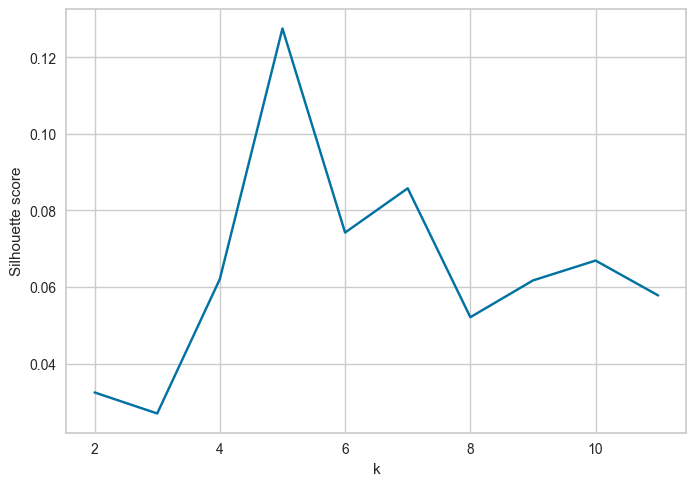

In [7]:
cluster_num_seq = range(2, 12) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
silhouette_vec = count_clustering_scores(lex_similarity, cluster_num_seq, KMedoids, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

## Sylwetka dla Jaccard

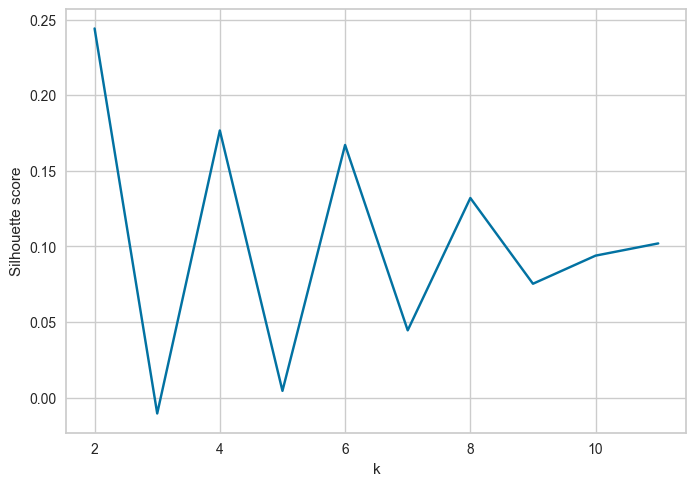

In [8]:
cluster_num_seq = range(2, 12) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
silhouette_vec = count_clustering_scores(jacc_similarity, cluster_num_seq, KMedoids, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

## Badanie różnych stosunków Jacc:Lex

In [ ]:
# 0.9/0.1

In [11]:
result_distance = 0.9 * jacc_similarity + 0.1 * lex_similarity

In [26]:
cluster_num_seq = range(2, 12) 
silhouette_vec = count_clustering_scores(result_distance, cluster_num_seq, KMedoids, silhouette_score)
silhouette_vec

[0.22216310279232088,
 0.12291293771519941,
 0.1840554831959007,
 0.10283685576127448,
 0.05416182158298762,
 0.02424414400418442,
 0.08820298466485459,
 0.09501816035139105,
 0.08551227351161676,
 0.023899186792224192]

In [ ]:
# 0.5/0.5

In [20]:
result_distance = 0.5 * jacc_similarity + 0.5 * lex_similarity

In [30]:
cluster_num_seq = range(2, 12) 
silhouette_vec = count_clustering_scores(result_distance, cluster_num_seq, KMedoids, silhouette_score)
silhouette_vec

[0.051217589968191195,
 0.11428994931254242,
 0.07596903768551094,
 0.06608397045059224,
 0.07500776230757779,
 0.03460053778227973,
 0.1142712001102783,
 0.017605990579256055,
 0.04549550652495782,
 0.07960994916502666]

In [ ]:
# 0.1/0.9

In [17]:
result_distance = 0.1 * jacc_similarity + 0.9 * lex_similarity

In [34]:
cluster_num_seq = range(2, 12) 
silhouette_vec = count_clustering_scores(result_distance, cluster_num_seq, KMedoids, silhouette_score)
silhouette_vec

[-0.027785995974116268,
 0.14778715803981654,
 0.017325509000343776,
 0.016563506990202183,
 0.05395200307964127,
 0.05844488298832673,
 0.0458178260962167,
 0.07474553817937285,
 0.08865214113210261,
 0.05872707244050653]

### Wnioski
Najmniejszy rozstrzał jakości klastrów posiadają ```k=8``` oraz ```k=10```.
Na podstawie wcześniejszych wyników i rad walidacji preferowana liczba klastrów to jednak ```k=8``` z dwójki powyższych.

Ze względu na najlepsze wyniki i charakterystykę problemu pod uwagę rozważony zostanie podział wyznaczony przez indeks Calinksiego-Harabasza - stanowi on bowiem miarę stosunku dyspersji pomiędzyklastrowej do dyspersji wewnątrz-klastrowej (większa wartość oznacza lepiej zdefiniowane klastry):


In [87]:
# Funkcja licząca labele kmedoidow dla 10 klastrów:
def labels_from_8_clusters(result_distances):
    kmedoids = KMedoids(n_clusters=8, metric='precomputed', init='k-medoids++', random_state=4207)
    kmedoids.fit_transform(result_distances)

    labels = kmedoids.labels_
    medoids = kmedoids.medoid_indices_
    
    return labels

In [27]:
result_distance = 0.9 * jacc_similarity + 0.1 * lex_similarity

In [100]:
labels = labels_from_8_clusters(result_distance)
calinski_score = calinski_harabasz_score(result_distance, labels)
calinski_score

522.5926975191

In [141]:
result_distance = 0.8 * jacc_similarity + 0.2 * lex_similarity

In [142]:
labels = labels_from_8_clusters(result_distance)
calinski_score = calinski_harabasz_score(result_distance, labels)
calinski_score

575.8142431015626

In [143]:
result_distance = 0.7 * jacc_similarity + 0.3 * lex_similarity

In [144]:
labels = labels_from_8_clusters(result_distance)
calinski_score = calinski_harabasz_score(result_distance, labels)
calinski_score

443.98444032116214

In [145]:
result_distance = 0.5 * jacc_similarity + 0.5 * lex_similarity

In [146]:
labels = labels_from_8_clusters(result_distance)
calinski_score = calinski_harabasz_score(result_distance, labels)
calinski_score

415.0992441527104

In [147]:
result_distance = 0.3 * jacc_similarity + 0.7 * lex_similarity

In [148]:
labels = labels_from_8_clusters(result_distance)
calinski_score = calinski_harabasz_score(result_distance, labels)
calinski_score

367.2716866739839

In [ ]:
# Po poprawie od walidacji:
results_dict = []
for i in range(101):
    result_distance = 1-(i/100) * jacc_similarity + (i/100)*lex_similarity
    labels = labels_from_8_clusters(result_distance)
    calinski_score = calinski_harabasz_score(result_distance, labels)
    calinski_score
    results_dict.append(calinski_score)

In [651]:
max_index = my_list.index(max(results_dict))
max_index

18

### Ostatecznie:

In [632]:
result_distance = 0.82 * jacc_similarity + 0.18 * lex_similarity

kmedoids = KMedoids(n_clusters=8, metric='precomputed', init='k-medoids++', random_state=123123)
kmedoids.fit_transform(result_distance)

labels = kmedoids.labels_
medoids = kmedoids.medoid_indices_

### Sprawdzenie charakterystyki klastrów
Mapowanie danych na n-wymiarową przestrzeń nie jest niestety efektywne ze względu na niezachowaną przez stringi nierówność trójkąta, stąd zagłębimy się w ich naturę w inny sposób:

In [633]:
# Funkcja generująca top n najczęściej występujących w liście stringów
def top_n_strings(string_list, n):
    counts = {}
    for string in string_list:
        if string in counts:
            counts[string]+=1
        else:
            counts[string]=1
    sorted_strings = sorted(counts, key=counts.get,reverse=True)
    top_n = sorted_strings[:n]
    return top_n

In [ ]:
# Ponieważ korzystamy z własnego modelu określenia odległości - nie możemy wytrenowanego modelu zweryfikować na zbiorze testowym
# Ze względu na róznicę w ilości features ramek (są to macierze kwadratowe więc jest ich tyle samo co rekordów w ramce).

# Sam dobór metryk i stosunków można więc traktować jako wytrenowanie modelu

In [343]:
test_distances = 0.82 * jacc_similarity_test + 0.18 * lex_similarity_test

In [344]:
kmedoids = KMedoids(n_clusters=8, metric='precomputed', init='k-medoids++', random_state=123123)
kmedoids.fit_transform(test_distances)

labels = kmedoids.labels_
medoids = kmedoids.medoid_indices_

## Rozmiar klastrów

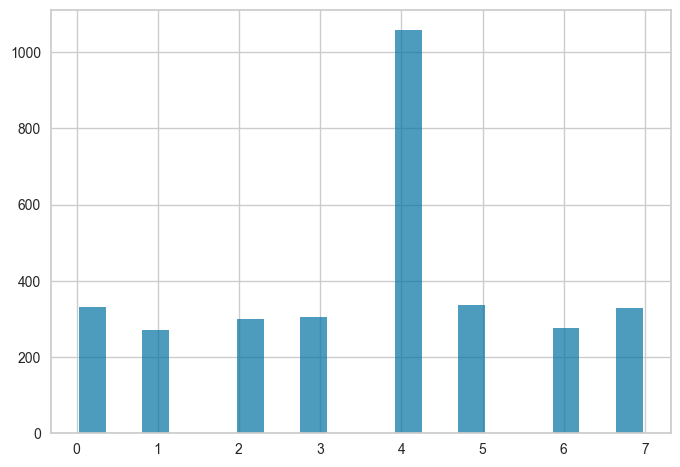

In [887]:
plt.hist(a, bins='auto', alpha=0.7, rwidth=0.85)
plt.grid(True)
plt.show()

## Najpopularniejsze słowa w klastrach

In [479]:
from wordcloud import WordCloud

def draw_cloud(word_list):
    word_counts = {}
    for word in word_list:
        word_counts[word] = word_counts.get(word, 0) + 1
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
# Definiujemy słownik {numer_klastra: lista_słów}
cluster_dict = {i:[] for i in range(8)}
titles_array = np.array(titles['0'])
for i in range(len(labels)):
    cluster_dict[labels[i]] += ast.literal_eval(titles_array[i])

In [830]:
# Najczęściej występujące słowa w danym klastrze:
for key in range(8):
    print(top_n_strings(cluster_dict[key], 10))

['phone', 'smartphone', 'sim', 'free', 'gb', 'apple', 'g', 'iphone', 'dual', 'unlocked']
['ghz', 'intel', 'processor', 'core', 'mb', 'xeon', 'cache', 'socket', 'l', 'amd']
['tv', 'hd', 'k', 'smart', 'led', 'ultra', 'samsung', 'hdr', 'inch', 'galaxy']
['kg', 'washing', 'machine', 'spin', '1400rpm', 'samsung', 'a', 'dishwasher', '1400', 'in']
['fridge', 'freezer', 'frost', 'freestanding', 'free', 'a', 'in', 'integrated', 'style', 'smeg']
['camera', 'digital', 'k', 'lens', 'canon', 't', 'with', 'a', 'body', 'x']
['dishwasher', 'integrated', 'washing', 'fully', 'bosch', 'machine', 'place', 'in', 'slimline', 'with']
['microwave', 'in', 'steel', 'stainless', 'grill', 'bosch', 'built', 'oven', 'free', 'fridge']


# Sprawdźmy jakie słowa występują w klastrach
Na tej podstawie będziemy w stanie stwierdzić jakiej kategorii produkty znajdują się w danym klastrze.

In [888]:
cluster_dict[0] = delete_occurrences(cluster_dict[0], 'freezer', 20)

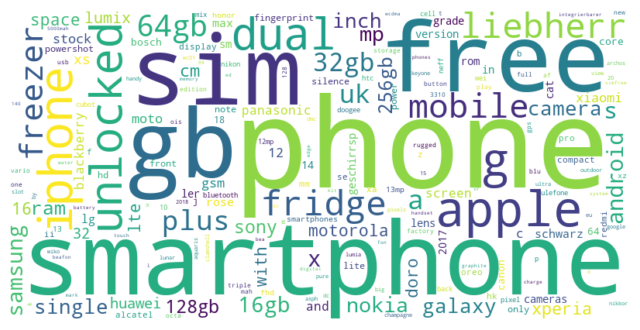

In [889]:
# Klaster 0
draw_cloud(cluster_dict[0])

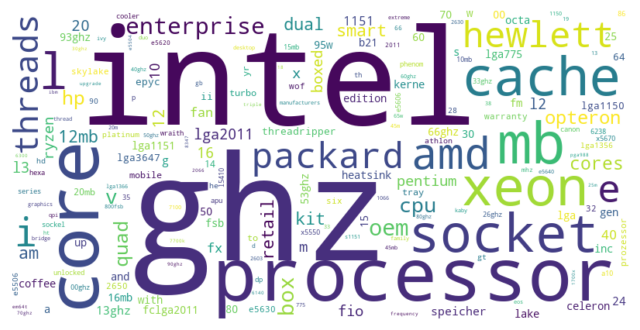

In [642]:
# Klaster 1
draw_cloud(cluster_dict[1])

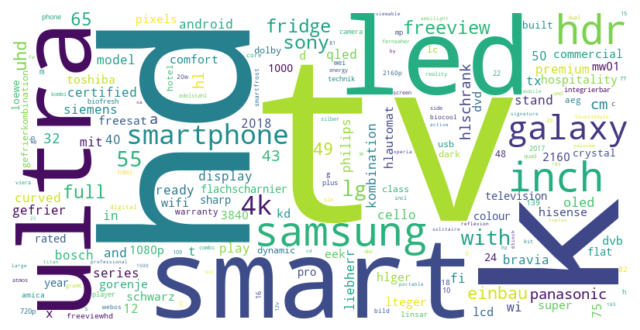

In [707]:
# Klaster 2
draw_cloud(cluster_dict[2])

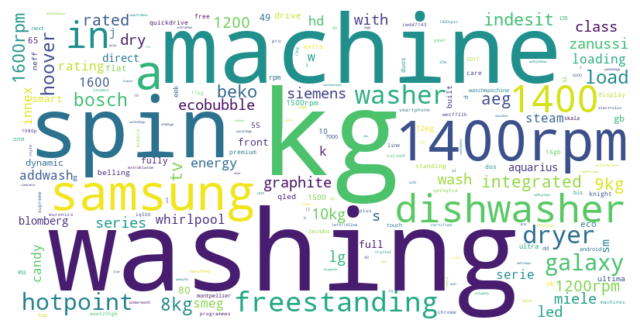

In [820]:
# Klaster 3
draw_cloud(cluster_dict[3])

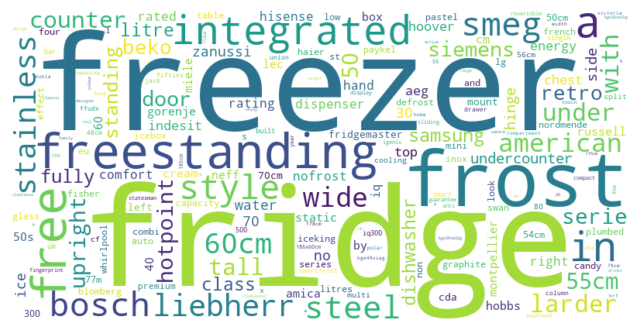

In [717]:
# Klaster 4
draw_cloud(cluster_dict[4])

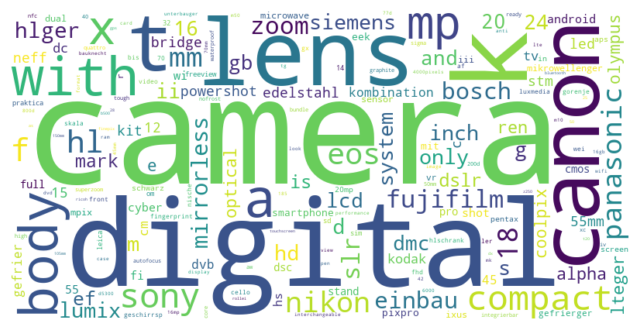

In [646]:
# Klaster 5
draw_cloud(cluster_dict[5])

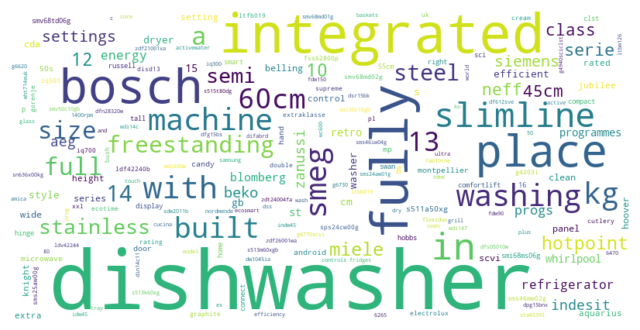

In [871]:
# Klaster 6
draw_cloud(cluster_dict[6])

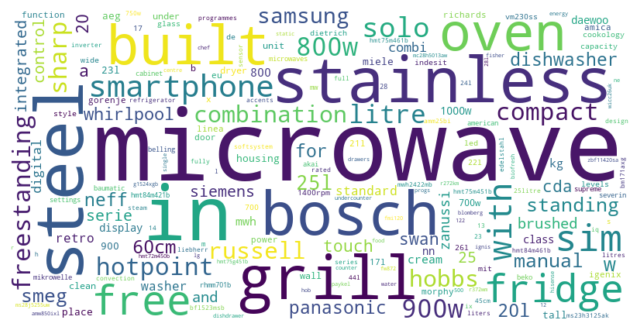

In [855]:
# Klaster 7
draw_cloud(cluster_dict[7])